In [50]:
import d2d
import importlib
importlib.reload(d2d)
import numpy as np
import tensorflow as tf
import pandas as pd


In [51]:
linear, lstm_model, dnn_model, df_all_chan,input_columns  = d2d.import_data()

da = df_all_chan.to_numpy()

# chan_mean = da[:,0:2495].flatten().mean()
# chan_std = da[:,0:2495].flatten().std()
# discharge_mean = da[:,2496].flatten().mean()
# discharge_std = da[:,2496].flatten().std()

# da[:,0:2495] = (da[:,0:2495] - chan_mean) / chan_std
# da[:,2496] = (da[:,2496] - discharge_mean) / discharge_std
df_all_chan

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


,0,1,2,3,4,5,6,7,8,9,...,2487,2488,2489,2490,2491,2492,2493,2494,2495,Discharge
0,1737.318436,1932.321258,1788.269101,3706.977556,1831.756626,1768.674227,1908.850695,3690.341997,1804.145150,2437.436803,...,3603.932847,2066.070800,2215.669390,1881.772352,3990.883595,1584.965970,1787.281257,1862.912440,4160.545583,9.947179
1,8161.349279,8245.783723,8118.189935,528.834231,468.890511,714.714310,728.051775,158.440806,82.719811,116.949415,...,8238.452283,8204.901437,8194.671705,8228.769841,8211.066134,8229.370787,8218.436955,8210.143402,8178.032001,9.934657
2,8242.942236,8205.640252,8093.980026,510.832905,451.884623,709.510655,709.932307,153.715844,83.404382,116.112236,...,8184.500407,8221.490571,8202.429647,8194.927561,8197.675324,8188.718827,8189.658071,8225.017259,8163.918322,9.929290
3,8159.780047,8196.654224,8113.873839,489.734947,438.657688,690.418208,701.896139,158.058233,83.003254,112.787627,...,8173.860868,8156.187127,8151.113841,8235.843141,8145.360321,8192.392266,8169.275389,8129.926491,8161.652382,9.923923
4,8198.498465,8161.470921,8120.452338,521.425978,444.272741,689.710217,695.164917,160.246640,84.054029,111.125592,...,8198.827286,8234.815465,8219.987333,8140.961605,8193.517740,8157.154485,8241.648596,8229.194191,8234.212679,9.918557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62740,8250.132344,8239.956853,8120.606117,709.708516,524.745767,837.184738,489.648388,74.456188,99.460249,91.911794,...,8237.995892,8243.180597,8263.685370,8236.631204,8275.920631,8158.055021,8254.067590,8260.170060,8189.577468,9.264333
62741,8305.046581,8215.717055,8123.947165,713.983575,522.460494,877.141941,504.369225,73.276914,98.030764,95.958327,...,8244.600296,8220.651129,8233.808688,8202.925678,8272.382131,8208.732997,8185.700921,8199.439315,8194.036074,9.263708
62742,8233.246034,8212.890322,8126.486773,712.414299,520.468924,892.210041,495.762205,72.542053,97.112611,98.886336,...,8296.184469,8233.850012,8214.919239,8173.153815,8231.181168,8183.252249,8171.110881,8196.319138,8220.779280,9.263083
62743,8230.088927,8237.590610,8188.620285,705.487651,523.552127,904.283215,506.508453,72.315307,96.342666,101.163440,...,8232.138229,8214.366628,8275.731039,8266.643805,8154.573206,8208.317212,8251.329151,8267.316168,8207.721162,9.262458


In [52]:
# test_data_frame = pd.DataFrame({'0':range(0,10000), 'Discharge':range(0,10000)})
# input_columns = ['0']

In [53]:
# print('Number of DAS observations: %d'%df_all_chan.shape[0])
# window_input_width = 200
# print('Number of tf Dataset windows: %d'%np.floor(df_all_chan.shape[0]/window_input_width))

In [54]:


# multi_step_window = d2d.WindowGenerator(test_data_frame,
#     input_width=window_input_width, label_width=1, shift=0,
#     label_columns=['Discharge'],
#     input_columns=input_columns,
#     shuffle=False)
window_input_width = 200
multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
    input_width=window_input_width, label_width=1, shift=0,
    label_columns=['Discharge'],
    input_columns=input_columns,
    shuffle=True)

(array([[[ 3.23465198e-01,  6.92641616e-01, -3.25650841e-01, ...,
         -4.57509339e-01, -1.35674119e+00, -1.07417393e+00],
        [ 2.28725895e-02,  1.28546751e+00,  1.18656945e+00, ...,
         -8.70991230e-01, -8.40256393e-01, -7.98951685e-01],
        [ 4.54441100e-01,  2.64431208e-01,  1.20038673e-01, ...,
         -6.97148502e-01, -8.03270280e-01, -7.63100684e-01],
        ...,
        [ 9.91751969e-01, -2.20495135e-01,  8.45678747e-01, ...,
         -3.94274712e-01, -1.08325744e+00, -1.06047893e+00],
        [ 3.70509952e-01,  4.51347083e-01,  1.40647635e-01, ...,
         -3.75875235e-01, -7.56621957e-01, -8.83021533e-01],
        [ 4.69581187e-02, -9.45215046e-01,  2.67594934e-01, ...,
         -3.48208785e-01, -8.61250520e-01, -9.65297699e-01]],

       [[-6.57153726e-02,  8.58329237e-01, -6.55569613e-01, ...,
          6.48160398e-01, -8.54518890e-01,  1.84592336e-01],
        [-1.08613396e+00, -6.85511947e-01,  5.23399413e-01, ...,
          5.47809541e-01, -7.64882445

In [55]:
# ntest = tf.data.experimental.cardinality(multi_step_window.test)
# nval = multi_step_window.val.cardinality().numpy()
# ntrain = multi_step_window.train.cardinality().numpy()
# print('Size of test ds: %d'%ntest)
# print('Size of val ds: %d'%nval)
# print('Size of train ds: %d'%ntrain)
# print('Sum of ds sizes = %d'%(ntest+nval+ntrain))


In [56]:
multi_step_window_shuffled.example

(<tf.Tensor: shape=(64, 200, 2308), dtype=float32, numpy=
 array([[[ 1.4091334e+00,  1.3330060e+00,  1.2372198e+00, ...,
           2.2264047e+00, -1.3747550e+00, -8.1804615e-01],
         [ 1.2836591e+00,  1.3168383e+00,  1.7537203e+00, ...,
           1.6974860e+00, -1.5487907e+00, -8.1907922e-01],
         [ 5.0077105e-01,  2.4064484e+00,  7.3056090e-01, ...,
           1.8792338e+00, -5.2853715e-01, -3.2889989e-01],
         ...,
         [ 7.8999239e-01, -6.7973316e-02,  1.1635927e+00, ...,
           1.3524337e+00, -2.8205287e+00, -1.4231715e+00],
         [ 3.0106911e-01,  1.1231250e+00,  1.0215614e+00, ...,
           6.9137198e-01, -2.5346313e+00, -1.2368587e+00],
         [ 1.1497808e+00,  1.8871064e+00,  1.0636173e+00, ...,
           1.8422543e-01, -2.4744356e+00, -1.4903549e+00]],
 
        [[-1.1481022e+00, -1.2344447e+00, -2.3026981e+00, ...,
           3.2291600e-01, -1.9358602e-01, -8.2690549e-01],
         [-2.2339761e+00, -3.1372044e+00, -1.2729419e+00, ...,
        

In [57]:
history = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)

Epoch 1/100
3/3 [==============================] - 2s 387ms/step - loss: 4.4514 - mean_absolute_error: 1.7040 - val_loss: 1.5554 - val_mean_absolute_error: 0.9913
Epoch 2/100
3/3 [==============================] - 1s 279ms/step - loss: 1.1458 - mean_absolute_error: 0.8467 - val_loss: 0.9466 - val_mean_absolute_error: 0.7764
Epoch 3/100
3/3 [==============================] - 1s 285ms/step - loss: 0.7817 - mean_absolute_error: 0.7098 - val_loss: 0.7242 - val_mean_absolute_error: 0.6699
Epoch 4/100
3/3 [==============================] - 1s 280ms/step - loss: 0.6460 - mean_absolute_error: 0.6401 - val_loss: 0.6018 - val_mean_absolute_error: 0.6121
Epoch 5/100
3/3 [==============================] - 1s 287ms/step - loss: 0.5665 - mean_absolute_error: 0.5967 - val_loss: 0.5172 - val_mean_absolute_error: 0.5650
Epoch 6/100
3/3 [==============================] - 1s 269ms/step - loss: 0.5048 - mean_absolute_error: 0.5590 - val_loss: 0.4674 - val_mean_absolute_error: 0.5323
Epoch 7/100
3/3 [=====

In [58]:
val_performance = lstm_model.evaluate(multi_step_window_shuffled.val)
performance = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)


1/1 [==============================] - 0s 243ms/step - loss: 0.1746 - mean_absolute_error: 0.2957


Text(0.5, 0, 'epochs')

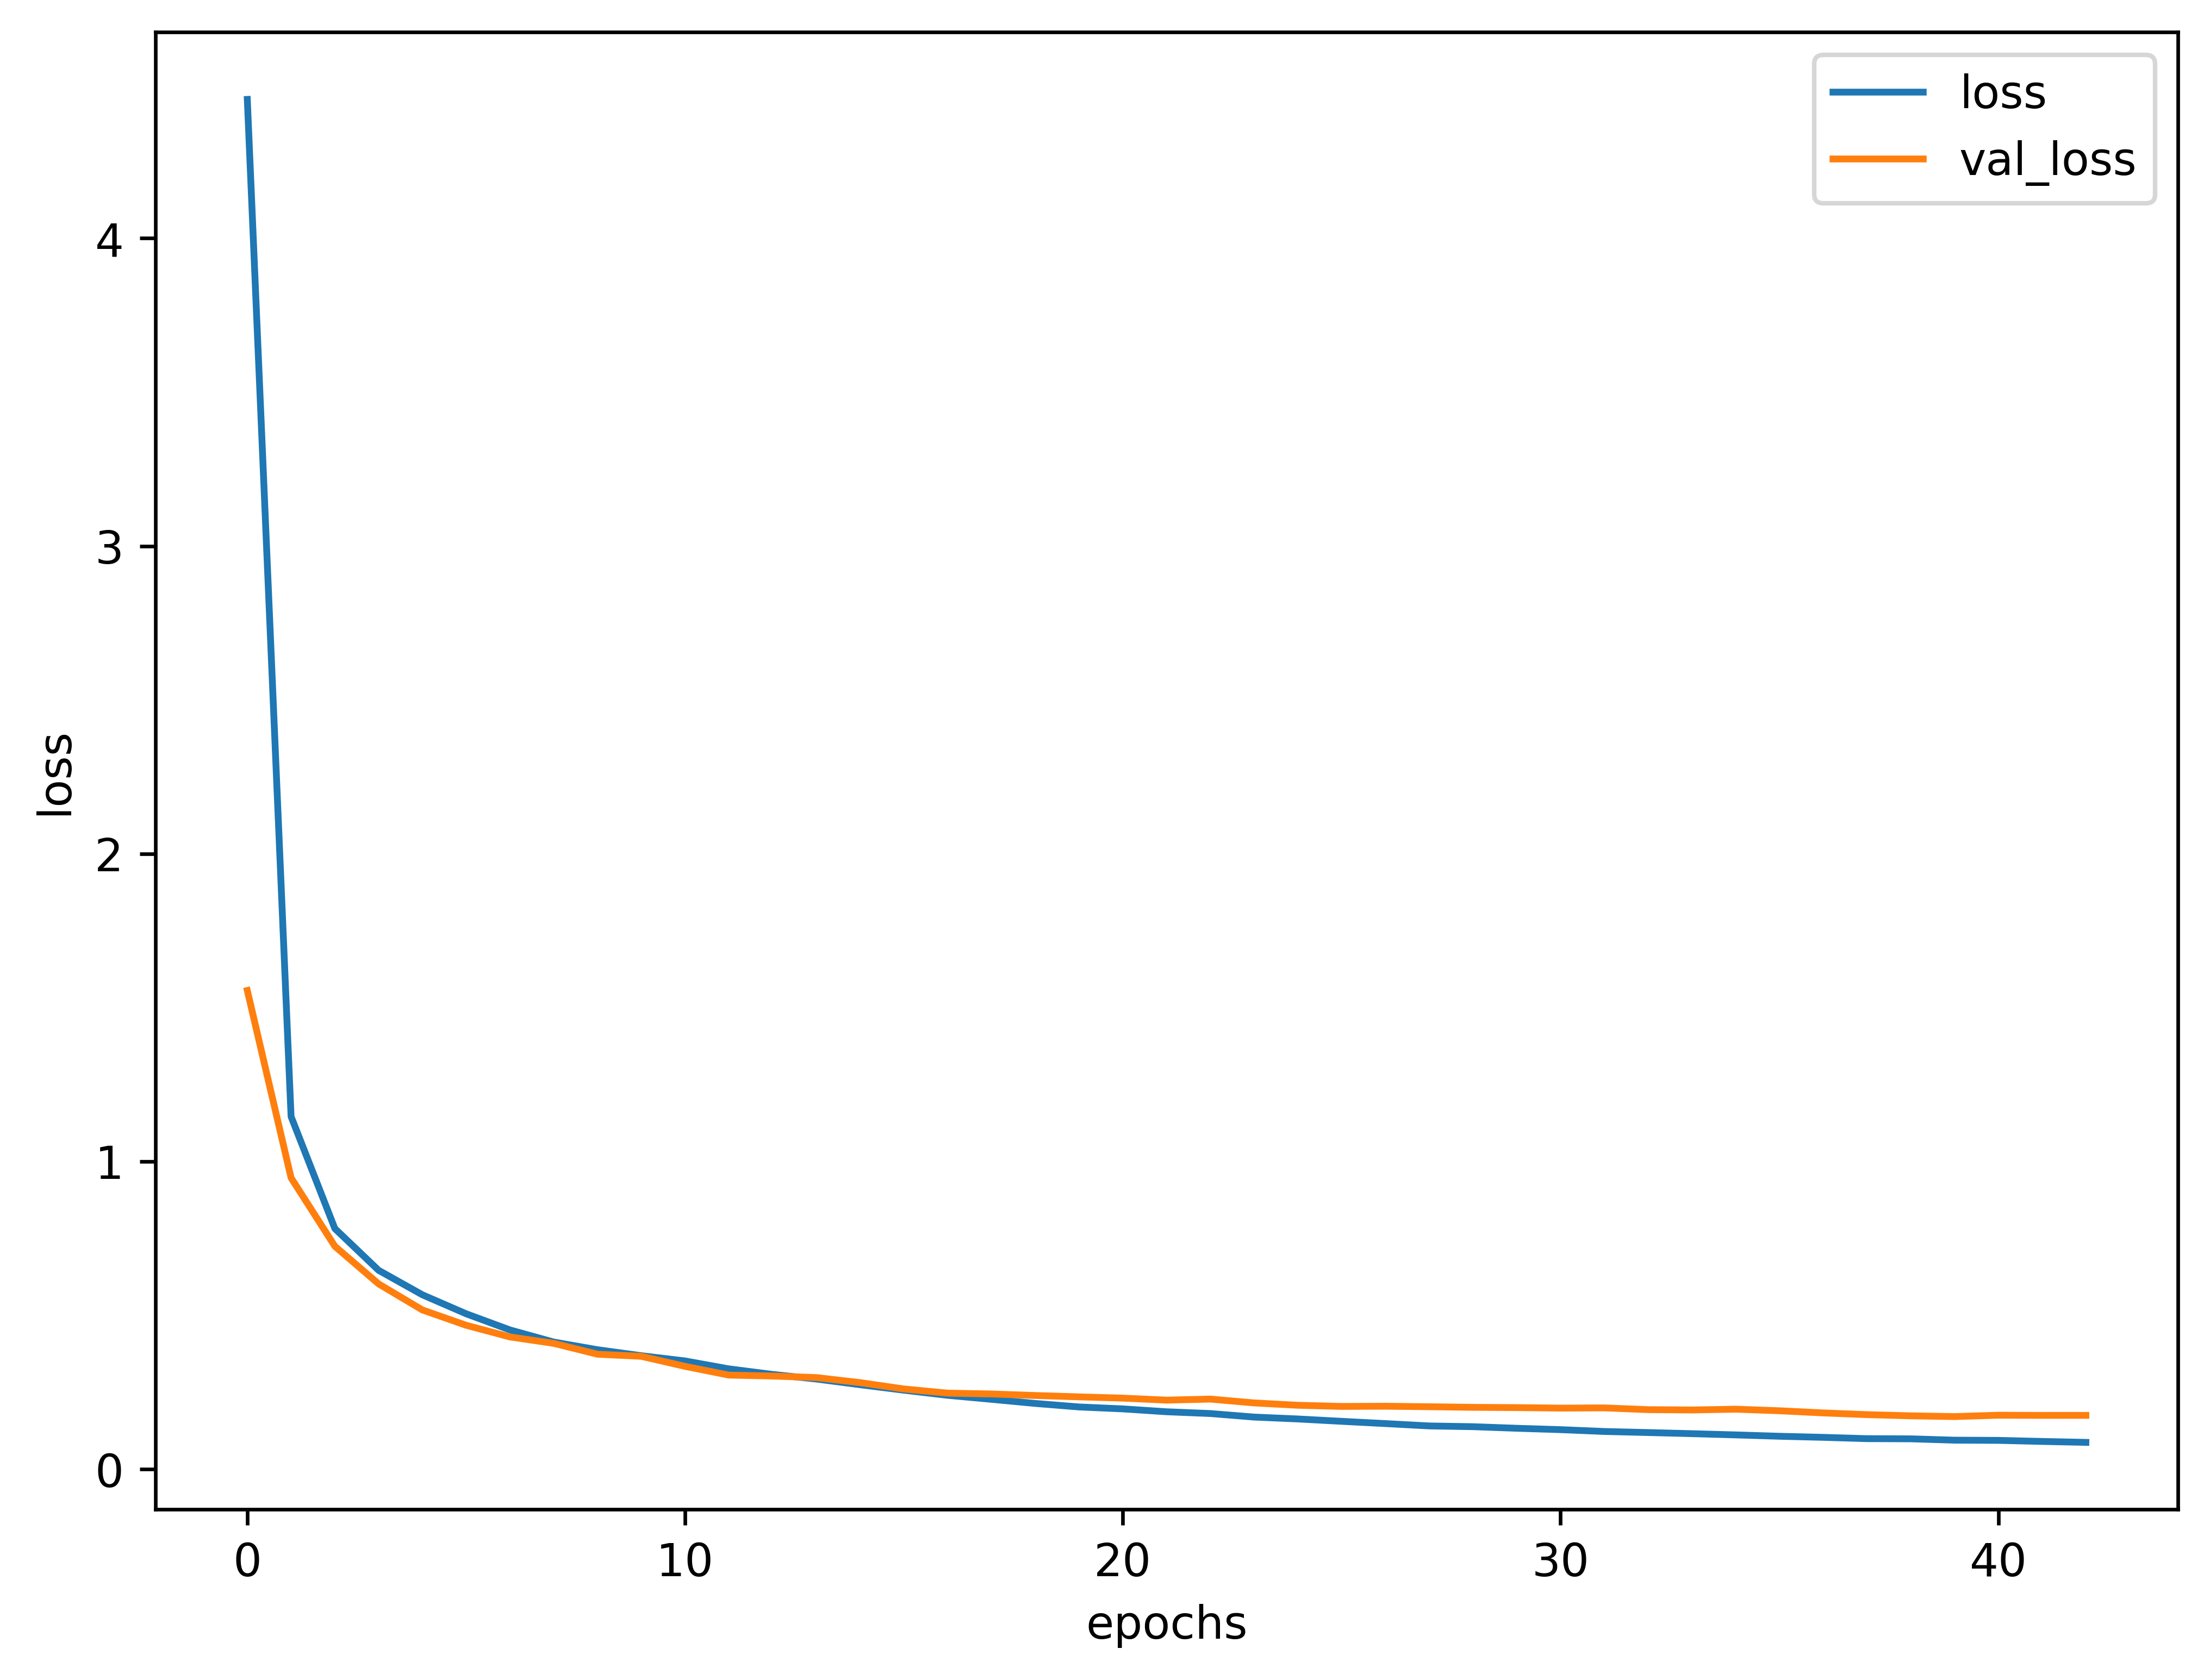

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6), dpi = 600)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epochs')